<a href="https://colab.research.google.com/github/LiscaAngriani/APM_Kelompok3/blob/main/KNN_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing the libraries  

import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 

In [5]:
data= pd.read_csv('nilai_to.csv')
data.head()

,Ranking,Nis,Nama,Sekolah,Nama PTN,Jurusan,PG,Penalaran Umum,Pemahaman bacaan & menulis,Pengetahuan Umum,Pengetahuan Kuantitatif,Inggris,Ekonomi,Sosiologi,Sejarah,Geografi,Nilai TPS,Nilai TKS,Skor UTBK,Status Kelulusan
0,1,20307332037,Rizqi Zuhdi Amarta,SMAN 1 PADANG,UNIVERSITAS GAJAH MADA,BANGUNAN SOSIAL DAN KESEJAHTERAAN,653.11,476,476,598,658,672,621,622,559,642,622.76,610.85,617.47,0
1,2,20307331061,Resti Natalia Chaniago,SMAN 5 PADANG,UNIVERSITAS GADJAH MADA,SEJARAH,484.58,525,525,595,595,574,560,560,560,595,568.75,569.80,569.28,1
2,3,20307331062,Indah Widia Sari,SMAN 5 PADANG,UNIVERSITAS INDONESIA,SASTRA INGGRIS,481.70,525,525,560,560,560,560,525,595,560,560.00,560.00,560.00,1
3,4,20307332049,Mulyadi,MAN 2 PADANG,UNIVERSITAS INDONESIA,SASTRA INDONESIA,465.99,525,525,560,525,543,560,525,560,525,542.50,542.50,542.50,1
4,5,20307331058,Elfaiza Warsya,SMA DONBOSCO,UNIVERSITAS INDONESIA,ILMU ADMINISTRASI NEGARA,485.77,560,560,490,560,546,525,595,490,490,551.25,529.20,540.23,1


In [7]:
feature_cols = ['Nis', 'PG', 'Nilai TPS', 'Nilai TKS','Skor UTBK']
X = data[feature_cols].values
y = data['Status Kelulusan'].values

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [11]:
y_pred = classifier.predict(X_test) 

In [12]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[10  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [13]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rata-rata')

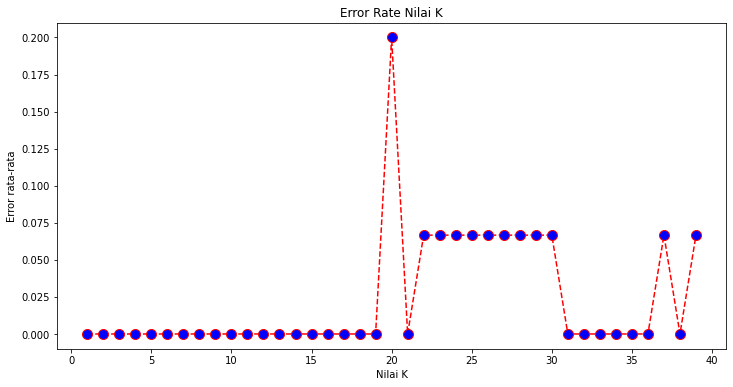

In [14]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata') 